# Mean Value Theorems

In [1]:
import numpy as np
from numpy import exp, log, sin, cos, pi
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.artist import Artist
from matplotlib.legend_handler import HandlerLine2D, HandlerPatch

import sys
sys.path.append("../")
from plt_tools import config_plt, fill_between_3d
config_plt()

In [2]:
def plot_3d_line(
        param: np.ndarray,
        x=None, 
        y=None, 
        z=None, 
        ax: plt.Axes | None = None,
        line_color="C0",
        line_style="-",
        fill_color=None,
        alpha=0.5,
        num_stubs=None,
        label=None
    ):
    
    id_func = lambda x : x
    if x is None: x = id_func
    if y is None: y = id_func
    if z is None: z = id_func
        
    if ax is None: ax = plt.gca()
        
    if fill_color is None: fill_color = line_color
    
    # plot 3D line
    a, b = np.min(param), np.max(param)
    x_data = x(param)
    y_data = y(param)
    z_data = z(param)
    ax.plot(
        x_data, y_data, z_data,
        linestyle=line_style,
        color=line_color,
        linewidth=1
    )
    
    # fill the area between z and xy-palne
    fill_between_3d(
        ax,
        *[x_data, y_data, np.zeros_like(x_data)],
        *[x_data, y_data, z_data ],
        mode=1,
        color=fill_color,
        alpha=alpha
    )
    
    # plot stubs of the fence
    if num_stubs is not None:
        stubs_param = np.linspace(np.min(param), np.max(param), num_stubs)
        stubs_x_data = x(stubs_param)
        stubs_y_data = y(stubs_param)
        stubs_z_data = z(stubs_param)
        for i in range(len(stubs_param)):
            ax.plot(
                [stubs_x_data[i]] * 2,
                [stubs_y_data[i]] * 2,
                [0.0, stubs_z_data[i]],
                linestyle=line_style,
                color=line_color
            )
    
    # make legend patch
    legend_patch = Patch(
        label=label,
        facecolor=fill_color,
        edgecolor=None,
        alpha=alpha
    )
    
    return legend_patch

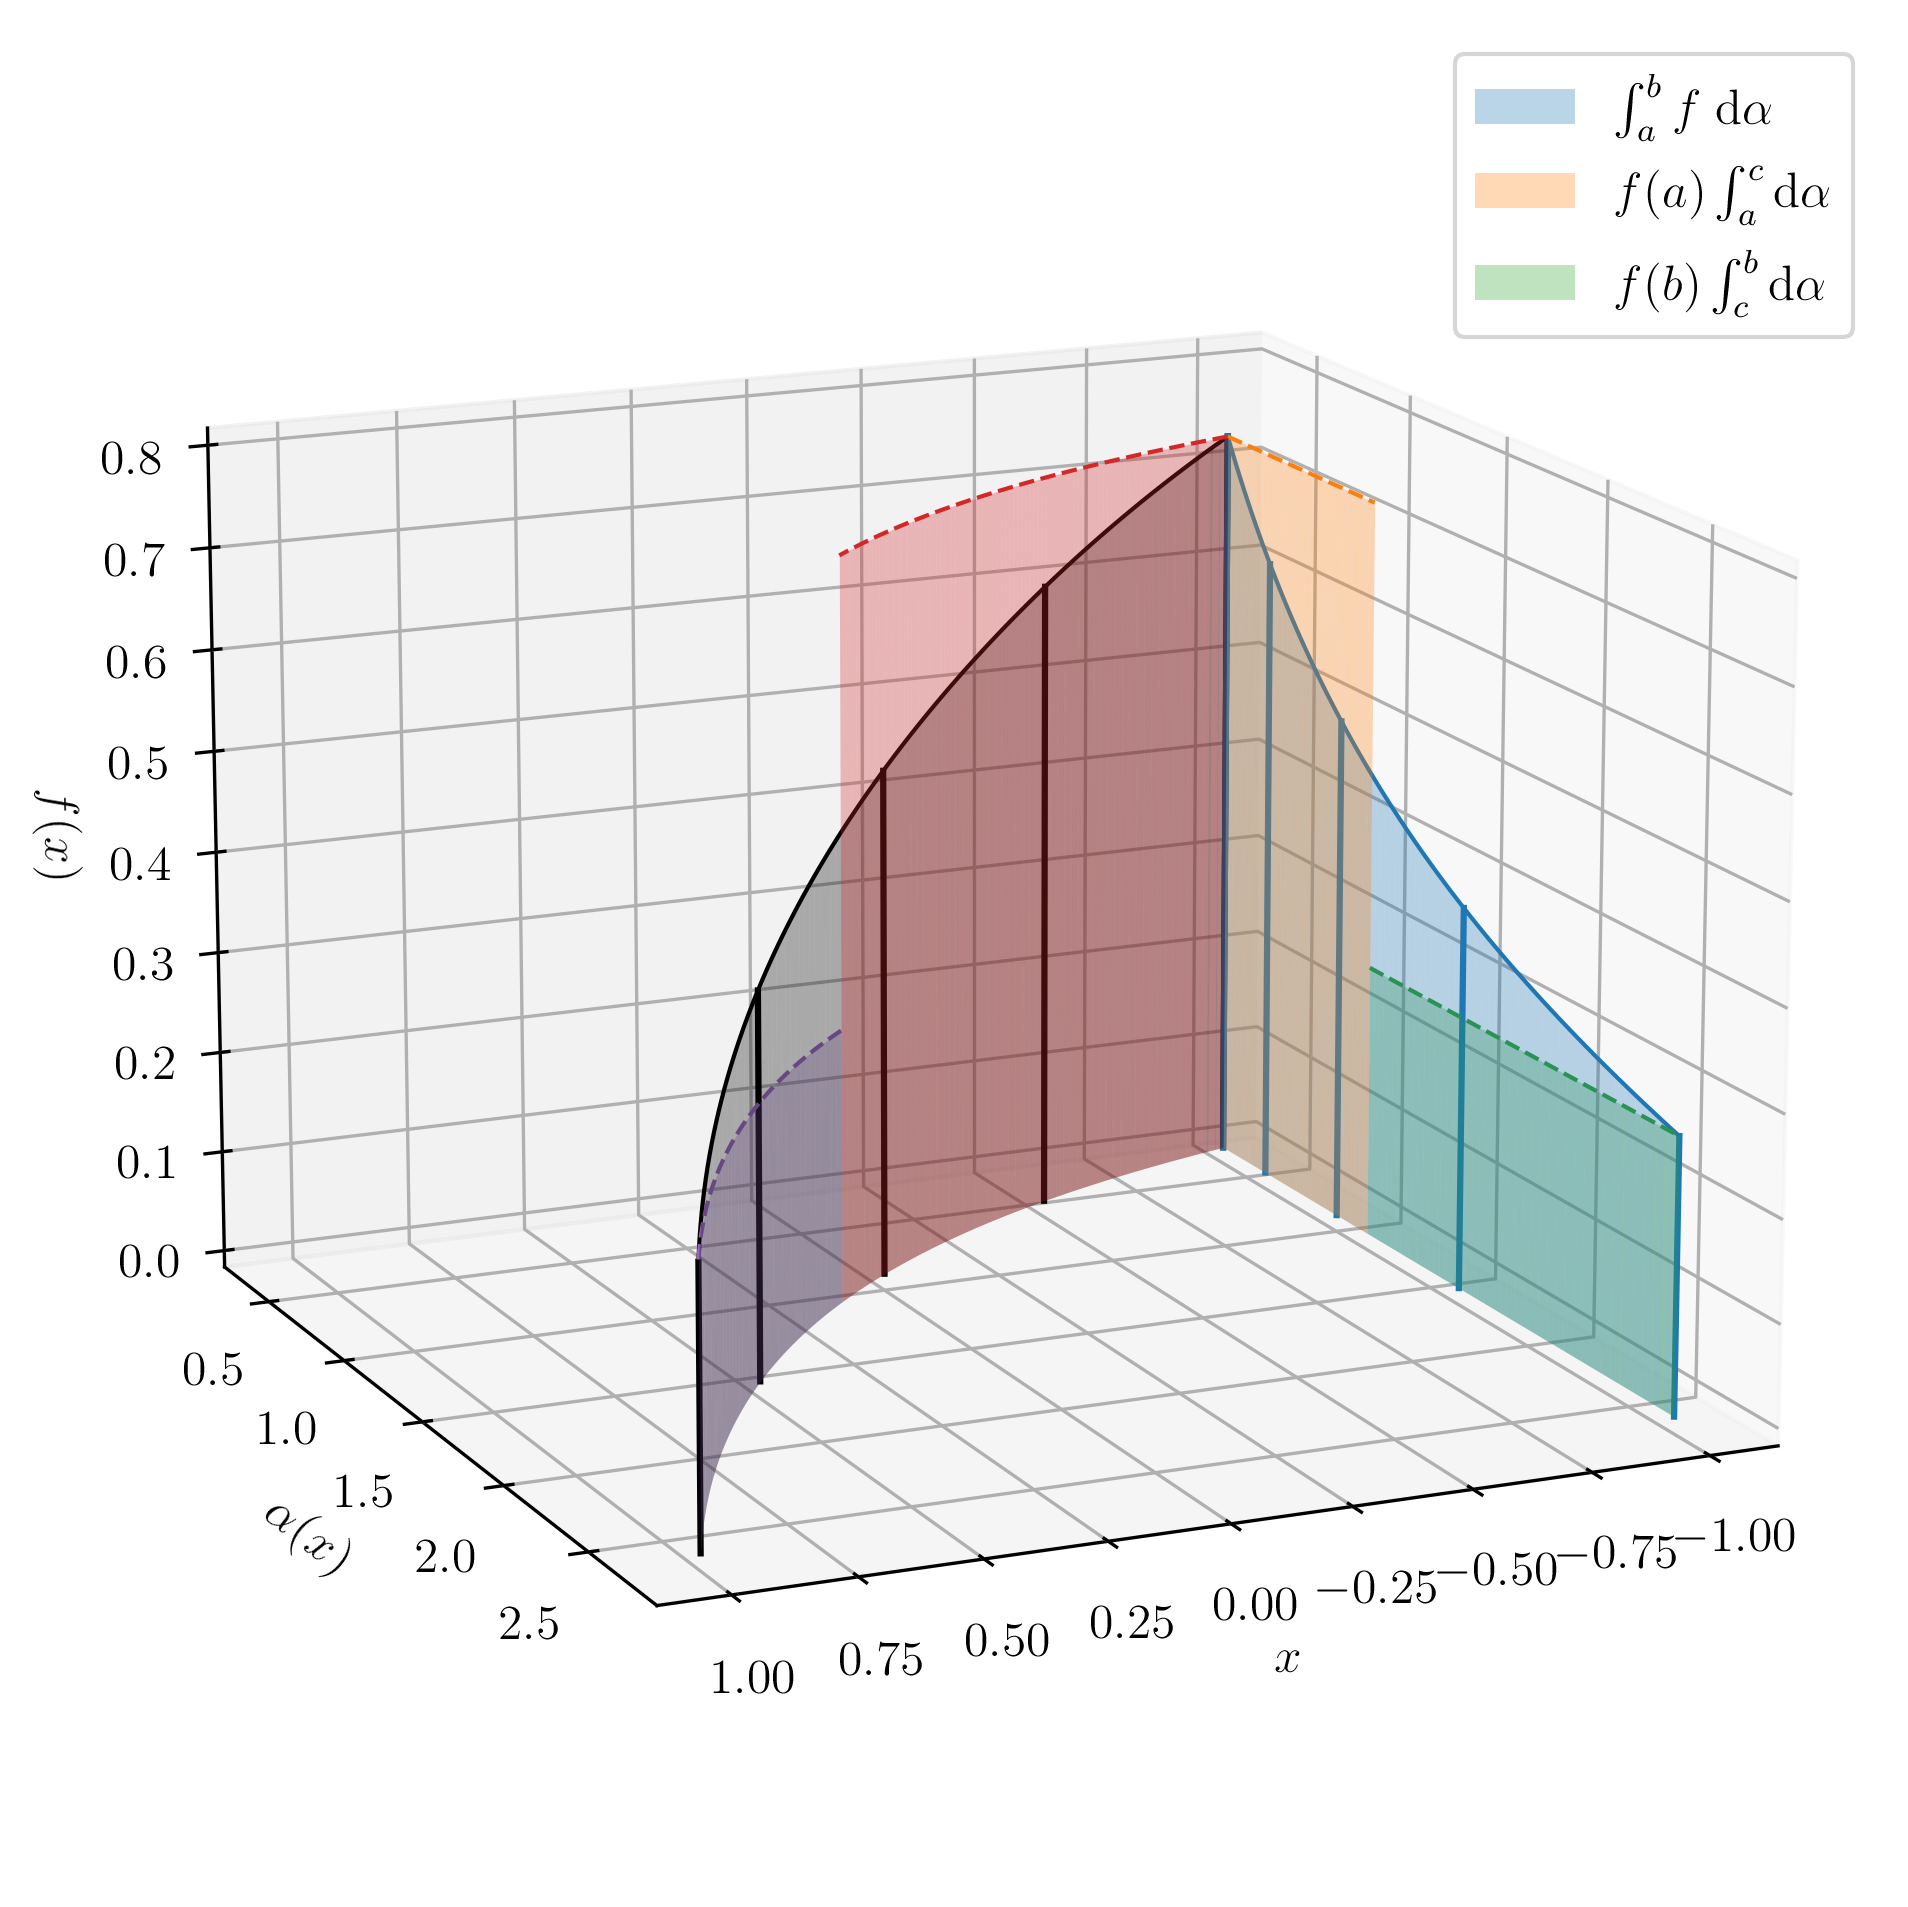

In [12]:
f = lambda x : 1 / (1 + exp(x))
alpha = lambda x : exp(x)

a, b = -1, 1
x = np.linspace(a, b, 100)

fig = plt.figure(figsize=(8, 8), dpi=300)
ax = fig.add_subplot(projection="3d")

plot_3d_line(
    param=x,
    y=alpha,
    z=f,
    ax=ax,
    line_color="k",
    alpha=0.3,
    num_stubs=5
)

p1 = plot_3d_line(
    param=x,
    x=lambda x : np.ones_like(x) * np.min(x),
    y=alpha,
    z=f,
    ax=ax,
    line_color="C0",
    alpha=0.3,
    label="$\int_a^b f \; \\mathrm{d} \\alpha$",
    num_stubs=5
)

c = log(2 / (exp(1) - 1))

x_sec1 = np.linspace(a, c, 100)
plot_3d_line(
    param=x_sec1,
    y=alpha,
    z=lambda x : np.ones_like(x) * f(a),
    ax=ax,
    line_color="C3",
    line_style="--",
    alpha=0.3
)

x_sec2 = np.linspace(c, b, 100)
plot_3d_line(
    param=x_sec2,
    y=alpha,
    z=lambda x : np.ones_like(x) * f(b),
    ax=ax,
    line_color="C4",
    line_style="--",
    alpha=0.3
)

p2 = plot_3d_line(
    param=x_sec1,
    x=lambda x : np.ones_like(x) * np.min(x),
    y=alpha,
    z=lambda x : np.ones_like(x) * f(a),
    ax=ax,
    line_color="C1",
    line_style="--",
    alpha=0.3,
    label="$f(a) \int_a^c \\mathrm{d} \\alpha$"
)

p3 = plot_3d_line(
    param=x_sec2,
    x=lambda x : np.ones_like(x) * np.min(x_sec1),
    y=alpha,
    z=lambda x : np.ones_like(x) * f(b),
    ax=ax,
    line_color="C2",
    line_style="--",
    alpha=0.3,
    label="$f(b) \int_c^b \\mathrm{d} \\alpha$"
)

ax.set_zlim(0, 0.8)
ax.set_xlabel("$x$")
ax.set_ylabel("$\\alpha(x)$")
ax.set_zlabel("$f(x)$")
ax.view_init(15, 66)

# set up legend
legend_elements = [p1, p2, p3]
ax.legend(handles=legend_elements)

plt.savefig(
    "../../tex/figures/ma-014.png",
    bbox_inches="tight",
    pad_inches=0
)
plt.show()